### Task 1.1: Compute the sparsity of User X Item matrix

In [3]:
import numpy as np
from scipy.sparse import csr_matrix

# generate user_list and item_list
user_list = {}
item_list = {}
user_cnt = 0
item_cnt = 0

with open ('../Dataset/ratings_Electronics_50.csv', 'r') as f:
    for line in f:
        user, item, rating, timestamp = line.split(",")
        if (user not in user_list):
            user_list[user] = user_cnt
            user_cnt = user_cnt + 1
        if (item not in item_list):
            item_list[item] = item_cnt
            item_cnt = item_cnt + 1


# generate user-item sparse matrix
rows = []
cols = []
vals = []

with open ('../Dataset/ratings_Electronics_50.csv', 'r') as f:
    for line in f:
        user, item, rating, timestamp = line.split(",")
        rows.append(user_list[user])
        cols.append(item_list[item])
        vals.append(float(rating))

user_item_matrix = csr_matrix((vals, (rows, cols)), dtype=float)
sparsity = 1 - user_item_matrix.count_nonzero()/len(user_list)/len(item_list)
print(sparsity)

0.9983039133516411


### Task 1.2: The rating histogram with respect to items

Text(0,0.5,'Number of Ratings')

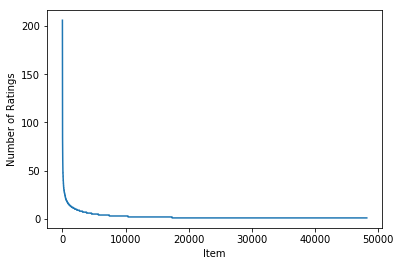

In [44]:
import matplotlib.pyplot as plt
import scipy.sparse

users, items, ratings =scipy.sparse.find(user_item_matrix)
item_rating_cnts = np.bincount(items)
item_hist = np.sort(item_rating_cnts)[::-1]
plt.plot(item_hist)
plt.xlabel("Item")
plt.ylabel("Number of Ratings")

### Task1.3: The rating histogram with respect to users

Text(0,0.5,'Number of Ratings')

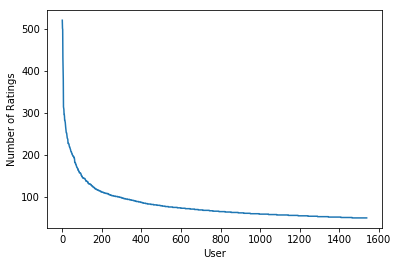

In [41]:
user_rating_cnts = np.bincount(users)
user_hist = np.sort(user_rating_cnts)[::-1]
plt.plot(user_hist)
plt.xlabel("User")
plt.ylabel("Number of Ratings")

### Task 1.4:

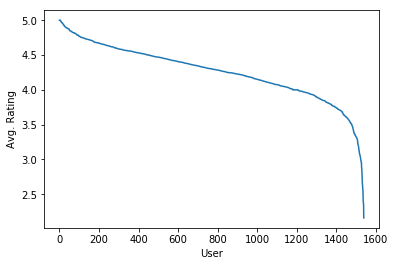

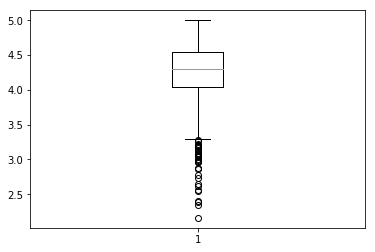

In [59]:
#Compute rating statistics per user

#For each user, compute its average rating
user_rating_means = np.bincount(users, weights=ratings) / user_rating_cnts
plt.plot(np.sort(user_rating_means)[::-1])
plt.xlabel("User")
plt.ylabel("Avg. Rating")
plt.show()

#Use the average rating of each user to plot boxplot 
plt.boxplot(user_rating_means)
plt.show()


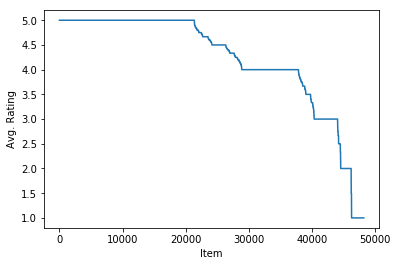

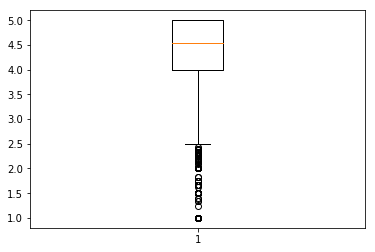

In [56]:
#Compute rating statistics per item

#For each item, compute its average rating
item_rating_means = np.bincount(items, weights=ratings) / item_rating_cnts
plt.plot(np.sort(item_rating_means)[::-1])
plt.xlabel("Item")
plt.ylabel("Avg. Rating")
plt.show()

#Use the average rating of each item to plot boxplot 
plt.boxplot(item_rating_means)
plt.show()

### Task 1.5:

(array([ 5115.,     0.,  5367.,     0.,     0., 12060.,     0., 32295.,
            0., 71034.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

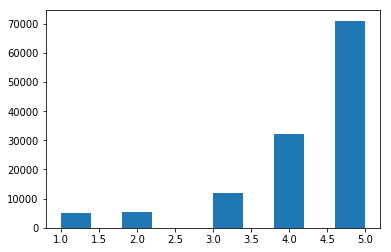

In [87]:
plt.hist(ratings)